In [2]:
import cv2
from IPython.display import Image, display
from matplotlib.pyplot import imshow
import numpy as np
from preprocessing import *
%matplotlib inline

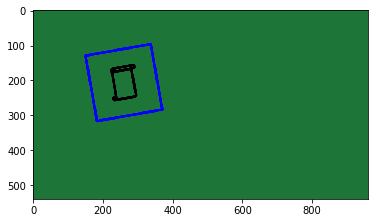

In [3]:
#Import and convert to hsv
img = cv2.imread('perfectWorld3.png')
imshow(img)

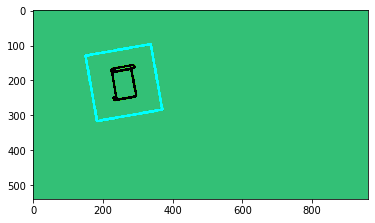

In [7]:
#Convert to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
imshow(hsv)

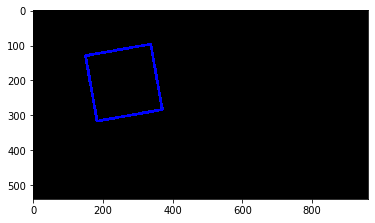

In [8]:
#blue mask
lower_red = np.array([0,50,50])
upper_red = np.array([10,255,255])
mask = cv2.inRange(hsv, lower_red, upper_red)
result = cv2.bitwise_and(img, img, mask = mask)
imshow(result)

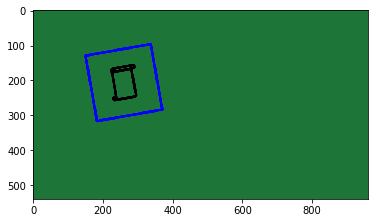

In [12]:
#good features
gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(gray, 4, 0.01, 10)
corners = np.int0(corners)

circle_img = img.copy()
bb = []
for i in corners:
    x, y = i.ravel()
    bb.append((x, y))
    cv2.circle(img, (x, y), 10, 255, -1)
imshow(circle_img)

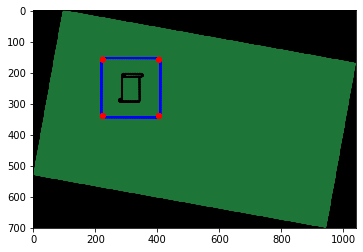

In [13]:
(heigth, width) = img.shape[:2]
(cx, cy) = (width // 2, heigth // 2)

bb_copy = bb.copy()
top_row = topRow(bb)

if top_row[0][1] > top_row[1][1]:
    c = -1
if top_row[0][1] < top_row[1][1]:
    c = 1

theta = 0
while round(top_row[0][1]) != round(top_row[1][1]):
    theta += 0.1*c
    bb_new = rotate_box(bb_copy, cx, cy, heigth, width, theta)
    top_row = topRow(bb_new)
rotated_img = rotate_bound(img, theta)
imshow(rotated_img)

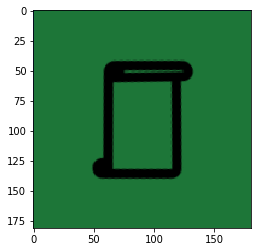

In [11]:
x1, x2, y1, y2 = Corners(bb_new)
crop = rotated_img[y1:y2, x1:x2]
imshow(crop)